# Libraries

In [52]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
plt.rcParams['figure.figsize'] = (10,10)

In [1]:
#borrar

# Dataset

In [4]:
archivo = 'data/players_22.csv'
df = pd.read_csv (archivo)

In [18]:
pd.set_option('display.max_columns', None)
df.head(10)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [6]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [8]:
df.isna().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [30]:
pd.set_option('display.max_columns', None)
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [20]:
pd.set_option("max_rows", None)
df['club_name'].value_counts()

Genoa                                33
RC Celta de Vigo                     33
Venezia FC                           33
Newcastle United                     33
Real Madrid CF                       33
Arsenal                              33
RCD Espanyol de Barcelona            33
Olympique de Marseille               33
Leicester City                       33
Everton                              33
Manchester United                    33
Norwich City                         33
Paris Saint-Germain                  33
CA Osasuna                           33
Crystal Palace                       33
Levante Unión Deportiva              33
FC Barcelona                         33
Wolverhampton Wanderers              33
Brentford                            33
Burnley                              33
Tottenham Hotspur                    33
Southampton                          33
Liverpool                            33
West Ham United                      33
Valencia CF                          33


In [38]:
df['league_name'].value_counts()

USA Major League Soccer                 771
Argentina Primera División              727
English League Championship             717
English Premier League                  652
Spain Primera Division                  633
English League One                      626
Spanish Segunda División                625
English League Two                      613
Japanese J. League Division 1           589
French Ligue 1                          577
Italian Serie A                         563
German 1. Bundesliga                    551
Turkish Süper Lig                       543
German 3. Bundesliga                    542
French Ligue 2                          529
German 2. Bundesliga                    510
Portuguese Liga ZON SAGRES              505
Polish T-Mobile Ekstraklasa             496
Holland Eredivisie                      492
Belgian Jupiler Pro League              488
Mexican Liga MX                         488
Saudi Abdul L. Jameel League            468
Chinese Super League            

In [ ]:
pd.set_option("max_rows", None)

<AxesSubplot:xlabel='age', ylabel='count'>

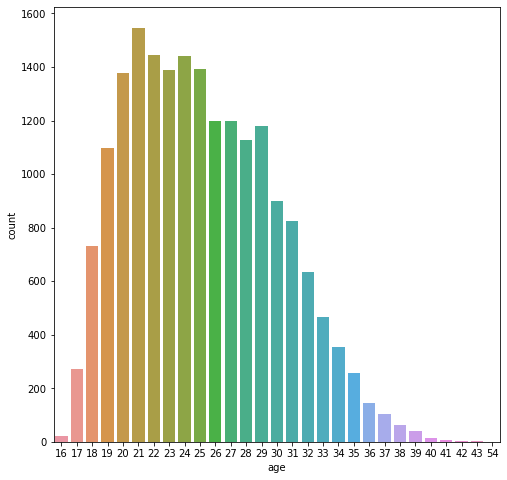

In [16]:
sns.countplot (data=df, x='age')

Text(0, 0.5, 'wage_eur')

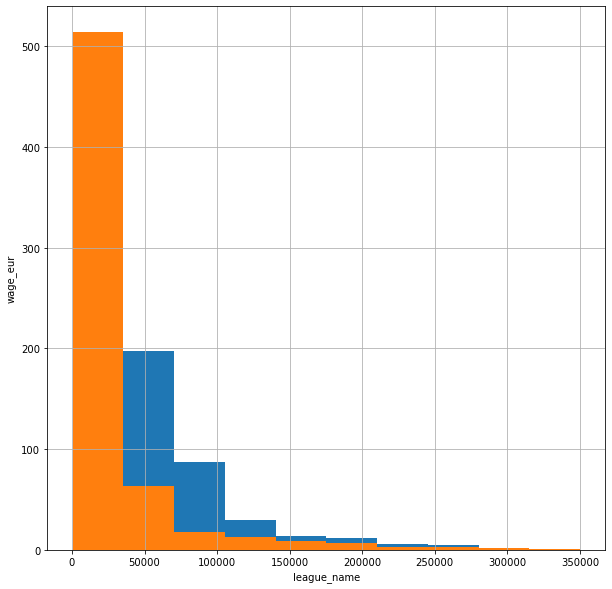

In [69]:
# Comparación de salarios por 1a liga ES y EN
df [df.league_name=='English Premier League'].wage_eur.hist()
df [df.league_name=='Spain Primera Division'].wage_eur.hist()
plt.xlabel('league_name')
plt.ylabel('wage_eur')

Text(0, 0.5, 'wage_eur')

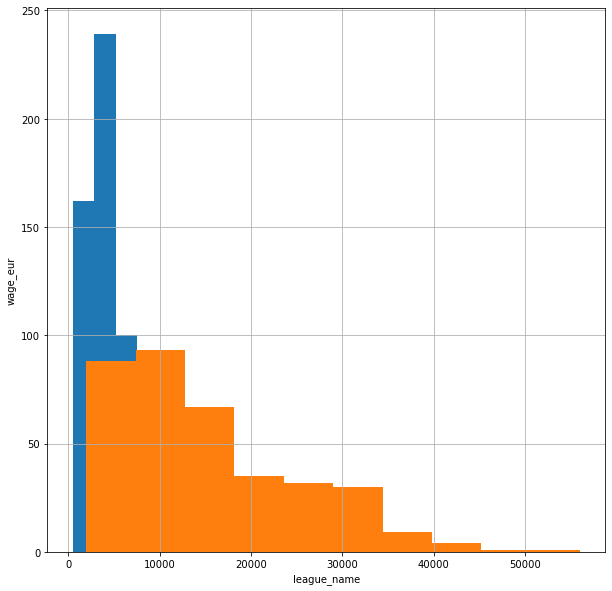

In [66]:
# Comparación de salarios por 1a liga ES y EN
df [df.league_name=='Argentina Primera División'].wage_eur.hist()
df [df.league_name=='Campeonato Brasileiro Série A'].wage_eur.hist()
plt.xlabel('league_name')
plt.ylabel('wage_eur')

In [70]:
df.groupby('league_name')['wage_eur'].mean()

league_name
Argentina Primera División               6140.990371
Australian Hyundai A-League              1638.447653
Austrian Football Bundesliga             5206.212121
Belgian Jupiler Pro League               7422.745902
Campeonato Brasileiro Série A           15263.888889
Chilian Campeonato Nacional              2016.451613
Chinese Super League                     4255.829596
Colombian Liga Postobón                   951.047120
Croatian Prva HNL                         591.071429
Cypriot First Division                    601.785714
Czech Republic Gambrinus Liga             739.240506
Danish Superliga                         4234.276730
Ecuadorian Serie A                        550.000000
English League Championship             11440.934449
English League One                       2879.313099
English League Two                       2592.985318
English National League                   500.000000
English Premier League                  50847.699387
Finnish Veikkausliiga             

In [58]:
df.groupby('short_name')['value_eur'].mean().sort_values(ascending=False).head(5)

short_name
K. Mbappé         194000000.0
E. Haaland        137500000.0
Neymar Jr         129000000.0
K. De Bruyne      125500000.0
R. Lewandowski    119500000.0
Name: value_eur, dtype: float64

In [59]:
df.nlargest(10,'value_eur')['short_name']

6               K. Mbappé
29             E. Haaland
9                 H. Kane
3               Neymar Jr
4            K. De Bruyne
1          R. Lewandowski
21          G. Donnarumma
43             F. de Jong
45              J. Sancho
44    T. Alexander-Arnold
Name: short_name, dtype: object

In [62]:
# Valor da transação
df.nlargest(5,'value_eur')

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,1998-12-20,182,73,73.0,Paris Saint-Germain,French Ligue 1,1.0,ST,7.0,NaN,2018-07-01,2022.0,18,France,1335.0,LW,10.0,Right,4,5,4,High/Low,Unique,Yes,373500000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical Fin...","Flair, Speed Dribbler (AI), Outside Foot Shot,...",97.0,88.0,80.0,92.0,36.0,77.0,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88,26,34,32,13,5,7,11,6,NaN,89+3,89+3,89+3,90,90,90,90,90,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,67+3,63+3,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
29,239085,https://sofifa.com/player/239085/erling-haalan...,E. Haaland,Erling Braut Haaland,ST,88,93,137500000.0,110000.0,20,2000-07-21,194,94,22.0,Borussia Dortmund,German 1. Bundesliga,1.0,RS,9.0,NaN,2020-01-01,2024.0,36,Norway,1352.0,LS,23.0,Left,3,3,4,High/High,Unique,Yes,244100000.0,"#Distance Shooter, #Strength, #Clinical Finish...","Solid Player, Speed Dribbler (AI)",89.0,91.0,65.0,80.0,45.0,88.0,47,94,69,77,88,78,77,62,51,85,82,94,75,88,72,94,74,82,93,87,85,43,89,71,76,84,44,43,30,7,14,13,11,7,NaN,87+3,87+3,87+3,80,84,84,84,80,81+3,81+3,81+3,78+3,73+3,73+3,73+3,78+3,62+3,63+3,63+3,63+3,62+3,60+3,60+3,60+3,60+3,60+3,19+3,https://cdn.sofifa.net/players/239/085/22_120.png,https://cdn.sofifa.net/teams/22/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1352/60.png,https://cdn.sofifa.net/flags/no.png
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,1993-07-28,188,89,18.0,Tottenham Hotspur,English Premier League,1.0,ST,10.0,NaN,2010-07-28,2024.0,14,England,1318.0,ST,9.0,Right,5,3,4,High/High,Unique,Yes,246100000.0,"#Distance Shooter, #Clinical Finisher","Leadership, Long Passer (AI), Long Shot Taker ...",70.0,91.0,83.0,83.0,47.0,83.0,80,94,86,85,88,83,83,65,86,85,65,74,71,92,70,91,79,83,85,86,80,44,94,87,91,91,50,36,38,8,10,11,14,11,NaN,88+2,88+2,88+2,84,86,86,86,84,85+3,85+3,85+3,84+3,82+3,82+3,82+3,84+3,67+3,68+3,68+3,68+3,67+3,64+3,61+3,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar 

In [61]:
df.nlargest(10,'value_eur')['league_name']

6             French Ligue 1
29      German 1. Bundesliga
9     English Premier League
3             French Ligue 1
4     English Premier League
1       German 1. Bundesliga
21            French Ligue 1
43    Spain Primera Division
45    English Premier League
44    English Premier League
Name: league_name, dtype: object

In [64]:
df[df.league_name=='Argentina Primera División'].nlargest(5,'value_eur')

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
840,240699,https://sofifa.com/player/240699/nicolas-de-la...,N. De la Cruz,Diego Nicolás De La Cruz Arcosa,"CM, CAM, LW",78,84,22000000.0,17000.0,24,1997-06-01,167,65,1876.0,River Plate,Argentina Primera División,1.0,RAM,11.0,NaN,2017-08-15,2022.0,60,Uruguay,NaN,NaN,NaN,Right,4,4,1,High/High,Normal (170-),No,35200000.0,"#Engine, #Acrobat","Long Shot Taker (AI), Speed Dribbler (AI)",84.0,75.0,77.0,81.0,69.0,67.0,72,73,69,79,72,81,83,76,72,78,86,83,92,77,86,80,83,93,44,75,87,71,79,80,69,82,64,74,64,9,6,9,7,9,NaN,75+2,75+2,75+2,79,79,79,79,79,79+2,79+2,79+2,79+2,78+2,78+2,78+2,79+2,76+2,74+2,74+2,74+2,76+2,75+2,70+2,70+2,70+2,75+2,15+2,https://cdn.sofifa.net/players/240/699/22_120.png,https://cdn.sofifa.net/teams/1876/60.png,https://cdn.sofifa.net/flags/ar.png,NaN,https://cdn.sofifa.net/flags/uy.png
412,190972,https://sofifa.com/player/190972/eduardo-salvi...,E. Salvio,Eduardo Antonio Salvio,"RM, RW",80,80,20500000.0,23000.0,30,1990-07-13,173,71,1877.0,Boca Juniors,Argentina Primera División,1.0,SUB,11.0,NaN,2019-07-18,2022.0,52,Argentina,NaN,NaN,NaN,Right,4,5,2,High/Medium,Normal (170-185),No,28700000.0,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Gian...",86.0,76.0,73.0,84.0,57.0,68.0,73,76,72,75,72,85,79,64,66,83,88,84,86,77,78,79,83,75,63,72,68,60,83,74,76,84,48,59,55,9,11,9,5,14,NaN,78+2,78+2,78+2,80,80,80,80,80,79+1,79+1,79+1,79+1,75+2,75+2,75+2,79+1,70+2,67+2,67+2,67+2,70+2,68+2,63+2,63+2,63+2,68+2,17+2,https://cdn.sofifa.net/players/190/972/22_120.png,https://cdn.sofifa.net/teams/1877/60.png,https://cdn.sofifa.net/flags/ar.png,NaN,https://cdn.sofifa.net/flags/ar.png
789,224254,https://sofifa.com/player/224254/cristian-pavo...,C. Pavón,Cristian David Pavón,"LW, RW, LM",78,81,18500000.0,20000.0,25,1996-01-21,174,78,1877.0,Boca Juniors,Argentina Primera División,1.0,SUB,31.0,NaN,2014-07-14,2022.0,52,Argentina,NaN,NaN,NaN,Right,3,4,1,High/Medium,Normal (170-185),No,27300000.0,"#Speedster, #Acrobat","Solid Player, Long Shot Taker (AI), Speed Drib...",90.0,76.0,74.0,79.0,49.0,73.0,74,72,48,75,63,78,78,76,68,76,92,89,91,77,85,83,65,89,73,83,56,49,76,75,72,70,65,40,33,11,10,9,13,7,NaN,74+2,74+2,74+2,78,77,77,77,78,77+2,77+2,77+2,78+2,73+2,73+2,73+2,78+2,67+2,64+2,64+2,64+2,67+2,63+2,56+2,56+2,56+2,63+2,18+2,https://cdn.sofifa.net/players/224/254/22_120.png,https://cdn.sofifa.net/teams/1877/60.png,https://cdn.sofifa.net/flags/ar.png,NaN,https://cdn.sofifa.net/flags/ar.png
1083,236441,https://sofifa.com/player/236441/fabricio-bust...,F. Bustos,Fabricio Bustos Sein,"RB, RWB",77,80,13000000.0,14000.0,25,1996-04-28,167,66,110093.0,Club Atlético Independiente,Argentina

In [65]:
# Valor da transação
df.nlargest(5,'wage_eur')

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,RCM,7.0,Right,5,4,4,High/High,Unique,Yes,232200000.0,"#Dribbler, #Playmaker, #Engine, #Distance Shoo...","Injury Prone, Leadership, Early Crosser, Long ...",76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
11,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,"CF, ST",89,89,66000000.0,350000.0,33,1987-12-19,185,81,243.0,Real Madrid CF,Spain Primera Division,1.0,CF,9.0,NaN,2009-07-09,2023.0,18,France,1335.0,CF,19.0,Right,4,4,4,Medium/Medium,Normal (170-185),Yes,135300000.0,#Poacher,"Leadership, Finesse Shot, Playmaker (AI), Outs...",76.0,86.0,81.0,87.0,39.0,77.0,75,90,89,86,86,87,81,73,73,90,77,75,79,91,72,85,79,78,82,79,63,39,90,87,84,90,43,24,18,13,11,5,5,7,NaN,87+2,87+2,87+2,85,87,87,87,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,63+3,62+3,62+3,62+3,63+3,59+3,55+3,55+3,55+3,59+3,18+3,https://cdn.sofifa.net/players/165/153/22_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
14,200145,https://sofifa.com/player/200145/carlos-henr

In [71]:
df[df.league_name=='Argentina Primera División'].nlargest(5,'wage_eur')

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
525,188042,https://sofifa.com/player/188042/matias-suarez...,M. Suárez,Matías Ezequiel Suárez,"ST, LW",79,79,11000000.0,24000.0,33,1988-05-09,183,75,1876.0,River Plate,Argentina Primera División,1.0,LS,7.0,NaN,2019-01-27,2023.0,52,Argentina,NaN,NaN,NaN,Right,4,4,2,High/Medium,Normal (170-185),No,15400000.0,#Acrobat,"Finesse Shot, Flair, Outside Foot Shot, Techni...",79.0,77.0,77.0,83.0,44.0,75.0,75,76,76,77,75,82,83,70,74,84,84,75,88,81,82,78,75,75,74,78,77,29,80,82,71,85,45,45,39,9,16,11,13,8,NaN,79,79,79,80-1,80-1,80-1,80-1,80-1,80-1,80-1,80-1,79,75+2,75+2,75+2,79,63+2,62+2,62+2,62+2,63+2,60+2,57+2,57+2,57+2,60+2,19+2,https://cdn.sofifa.net/players/188/042/22_120.png,https://cdn.sofifa.net/teams/1876/60.png,https://cdn.sofifa.net/flags/ar.png,NaN,https://cdn.sofifa.net/flags/ar.png
412,190972,https://sofifa.com/player/190972/eduardo-salvi...,E. Salvio,Eduardo Antonio Salvio,"RM, RW",80,80,20500000.0,23000.0,30,1990-07-13,173,71,1877.0,Boca Juniors,Argentina Primera División,1.0,SUB,11.0,NaN,2019-07-18,2022.0,52,Argentina,NaN,NaN,NaN,Right,4,5,2,High/Medium,Normal (170-185),No,28700000.0,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Gian...",86.0,76.0,73.0,84.0,57.0,68.0,73,76,72,75,72,85,79,64,66,83,88,84,86,77,78,79,83,75,63,72,68,60,83,74,76,84,48,59,55,9,11,9,5,14,NaN,78+2,78+2,78+2,80,80,80,80,80,79+1,79+1,79+1,79+1,75+2,75+2,75+2,79+1,70+2,67+2,67+2,67+2,70+2,68+2,63+2,63+2,63+2,68+2,17+2,https://cdn.sofifa.net/players/190/972/22_120.png,https://cdn.sofifa.net/teams/1877/60.png,https://cdn.sofifa.net/flags/ar.png,NaN,https://cdn.sofifa.net/flags/ar.png
789,224254,https://sofifa.com/player/224254/cristian-pavo...,C. Pavón,Cristian David Pavón,"LW, RW, LM",78,81,18500000.0,20000.0,25,1996-01-21,174,78,1877.0,Boca Juniors,Argentina Primera División,1.0,SUB,31.0,NaN,2014-07-14,2022.0,52,Argentina,NaN,NaN,NaN,Right,3,4,1,High/Medium,Normal (170-185),No,27300000.0,"#Speedster, #Acrobat","Solid Player, Long Shot Taker (AI), Speed Drib...",90.0,76.0,74.0,79.0,49.0,73.0,74,72,48,75,63,78,78,76,68,76,92,89,91,77,85,83,65,89,73,83,56,49,76,75,72,70,65,40,33,11,10,9,13,7,NaN,74+2,74+2,74+2,78,77,77,77,78,77+2,77+2,77+2,78+2,73+2,73+2,73+2,78+2,67+2,64+2,64+2,64+2,67+2,63+2,56+2,56+2,56+2,63+2,18+2,https://cdn.sofifa.net/players/224/254/22_120.png,https://cdn.sofifa.net/teams/1877/60.png,https://cdn.sofifa.net/flags/ar.png,NaN,https://cdn.sofifa.net/flags/ar.png
1025,227528,https://sofifa.com/player/227528/braian-romero...,B. Romero,Braian Ezequiel Romero,"ST, RW, LW",77,77,10500000.0,20000.0,30,1991-06-15,178,73,1876.0,River Plate,Argentina Primera División,1.0,RS,1